<a href="https://colab.research.google.com/github/abhishekmadhu/deep-learning-public/blob/main/ANN_from_scratch_for_mathematical_concepts_of_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How a Network Learns

In this short demonstration, we will try to understand the mathematics behind forward and backward propagation steps, demonstrating how a neural network "learns" information. 

This code is supplementary material for the online tutorial available in public domain. Please feel free to follow along with the video, or write this down after you understand all the steps. Please do not copy-paste as that is not very helpful with learning the maths. 

If the steps seems difficult to recall, as mentioned in the video, use flash cards to help retain information. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# XOR Training data
x = np.array([
              [0, 0],
              [0,1],
              [1,0],
              [1,1]
])

y = np.array([[0], [1], [1], [0]])

# You can also uncomment the AND test data below and test with that. 
# You will need to run all cells again
# # AND
# x = np.array([
#               [0, 0],
#               [0,1],
#               [1,0],
#               [1,1]
# ])

# y = np.array([[0], [0], [0], [1]])

In [3]:
input_neurons_count = 2
hidden_neurons_count = 5
output_neurons_count = 1

In [4]:
# Randomly initialize weights between input and hidden layers
Wxh = np.random.randn(input_neurons_count, hidden_neurons_count)

# Since all inputs are equally important, the bias can all be 0
# The size of the bias matrix should be 1 * <number of neurons in layer>
bh = np.zeros((1, hidden_neurons_count))

In [5]:
# Randomly initialize weights between hidden and output layers
Why = np.random.randn(hidden_neurons_count, output_neurons_count)

# Since all inputs are equally important, the bias can all be 0
# The size of the bias matrix should be 1 * <number of neurons in layer>
by = np.zeros((1, output_neurons_count))

In [6]:
# Define the sigmoid activation function and its first order derivative
def sigmoid(v):
  return 1 / ( 1 + np.exp(-v) )

def d_sigmoid(v):
  return np.exp(-v) / (( 1 + np.exp(-v) ) ** 2)

In [7]:
# Define the forward propagation
def forward_propagation(x, Wxh, Why):
  z1 = np.dot(x, Wxh) + bh
  # print(f'z1: {z1}')
  a1 = sigmoid(z1)
  # print(f'a1: {a1}')
  z2 = np.dot(a1, Why) + by
  # print(f'z2: {z2}')
  y_hat = sigmoid(z2)
  # print(f'y_hat: {y_hat}')
  return z1, a1, z2, y_hat

In [8]:
# Define the backward propagation
def backward_propagation(y_hat, z1, a1, z2):
  error = y-y_hat
  d2 = np.multiply(-error, d_sigmoid(z2))
  dj_wrt_dWhy = np.dot(a1.T, d2)
  d1 = np.dot(d2, Why.T) * d_sigmoid(z1)
  dj_wrt_dWxh = np.dot(x.T, d1)

  return dj_wrt_dWxh, dj_wrt_dWhy

In [9]:
# define the cost function
def cost(y, y_hat):
  j = 0.5 * sum((y-y_hat)**2)
  return j

In [10]:
alpha = 0.01
learning_rate = alpha
iterations = 50000

In [11]:
costs = []
for i in range(iterations):
  # Do one forward and backward pass to get the derivatives
  z1, a1, z2, y_hat = forward_propagation(x, Wxh, Why)
  # print(f'Iteration {i}: {z1, a1, z2, y_hat}')
  dj_wrt_dWxh, dj_wrt_dWhy = backward_propagation(y_hat, z1, a1, z2)

  # update the weights
  Wxh = Wxh - learning_rate * dj_wrt_dWxh
  Why = Why - learning_rate * dj_wrt_dWhy

  # calculate the cost
  this_iteration_cost = cost(y, y_hat)
  # print(f'{i}_iteration_cost: {this_iteration_cost}')
  costs.append(this_iteration_cost)

In [12]:
# see the weignts matrix after training
print(f'Weights between input layer and hidden layer\nShape:{Wxh.shape}\nValues:\n', Wxh)
print('\n')
print(f'Weights between hidden layer and output layer\nShape:{Why.shape}\nValues:\n', Why)

Weights between input layer and hidden layer
Shape:(2, 5)
Values:
 [[ 2.18063739  4.09924985 -4.95665581 -2.94565276 -0.56429287]
 [-1.31626759  4.39256995  2.47150562  6.1285199  -1.51011008]]


Weights between hidden layer and output layer
Shape:(5, 1)
Values:
 [[-4.04046127]
 [ 7.51214956]
 [ 3.43942177]
 [-7.07568562]
 [-3.47761947]]


Text(0, 0.5, 'Cost')

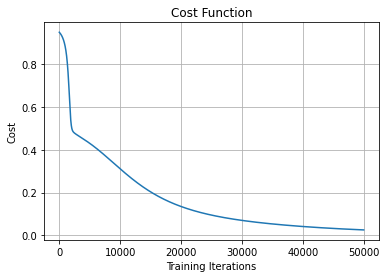

In [13]:
plt.grid()
plt.plot(range(iterations), costs)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

In [14]:
# # Try prediction
def predict(x_test):
  _, __, ___, prediction = forward_propagation(x_test, Wxh, Why)
  return prediction

def predict_with_threshold(x_test, threshold=0.5):
  prediction = predict(x_test)

  results = []

  for p in prediction:
    # print(f'p: {p}')
    if p[0] > threshold:
      results.append(1)
    else:
      results.append(0)
  
  return results

In [15]:
test_data = [
  [1,1], 
  [0,0], 
  [1,0],
  [0,1]
]

In [16]:
print(f'y_hat values after forward propagation:\n {predict(test_data)}')
print(f'final predictions: {predict_with_threshold(test_data, threshold=0.8)}')

y_hat values after forward propagation:
 [[0.09537209]
 [0.13930223]
 [0.89743806]
 [0.88575926]]
final predictions: [0, 0, 1, 1]


So now we understand the mathematics behing the while system. This tells us that if we can somehow change something into numbers, we can, theoretically, allow the machine to learn the patterns. 

Constraints in this case could be sheer volume, or mere lack of data, and in those cases, we need tricks to keep the learning going with the limited resources we have. 